In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import random as rd

In [74]:
data_table = pd.read_csv('iris.csv', names =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'])

In [75]:
iris_data_multiclass = pd.read_csv('iris_multiclasse.csv', names =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower1','flower2','flower3'])

In [76]:
def normalization(matrix, vector):
    #Mean calculation
    mVector = np.mean(vector, axis=0)
    mMatrix = np.mean(matrix, axis=0)
    
    #Standard deviation
    stdVector = np.std(vector, axis = 0)
    stdMatrix = np.std(matrix, axis = 0)
     
    #Normalization of data
    vector = (vector - mVector)/stdVector
    matrix = (matrix - mMatrix)/stdMatrix
    
    return matrix, vector

In [77]:
def predict_logistic_regression_binary(matrix_x, w):
    
    predictions = []
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)
    for i in range(matrix_x.shape[0]):
        predictions.append(round(sigmoide(matrix_x[i].dot(w))))
        
    return predictions

In [78]:
def predict_multiclass_logistic_regression(matrix_x_multiclass, w):
    
    matrix_x_multiclass = np.insert(matrix_x_multiclass, 0, 1, axis =1)
    
    size = (matrix_x_multiclass.shape[0], w.shape[0])
    predictions = np.ones(size, dtype=float)
    
    for k in range(w.shape[0]):   
        for i in range(matrix_x_multiclass.shape[0]):
            num = np.exp(w[k].dot(matrix_x_multiclass[i]))
            sum_ = 0
            for j in range(w.shape[0]):
                sum_ = sum_ + np.exp(w[j].dot(matrix_x_multiclass[i]))
            predictions[i][k] = num/sum_

    for i in range(predictions.shape[0]):
        index = np.argmax(predictions[i], axis=0)
        for j in range(len(predictions[i])):
            if(j == index):
                predictions[i][index] = 1.0
            else:
                predictions[i][j] = 0.0
    
    return predictions

In [79]:
def plot_cost(mse):
    plt.plot(list(range(0, len(mse))), [item[0] for item in mse])
    plt.show()

In [80]:
def crossValidationSplit(xMatrix, yVector, n_folds): 
    xMatrixSplit = []
    yVectorSplit = []
    xMatrixCopy = xMatrix

    yVectorCopy = yVector
    foldSize = int(len(xMatrix) / n_folds) 
    
    for i in range(n_folds): 
        foldXM = [] 
        foldYV = []
        while len(foldXM) < foldSize: 
            index = rd.randrange(len(xMatrixCopy)) 
            foldXM.append(xMatrixCopy[index]) 
            xMatrixCopy = np.delete(xMatrixCopy, index, axis=0)
            foldYV.append(yVectorCopy[index]) 
            yVectorCopy = np.delete(yVectorCopy, index)
        xMatrixSplit.append(foldXM)
        yVectorSplit.append(foldYV)
    return xMatrixSplit, yVectorSplit


def crossValidationSplitMulticlass(xMatrix, yVector, n_folds): 
    xMatrixSplit = []
    yVectorSplit = []
    xMatrixCopy = xMatrix

    yVectorCopy = yVector

    foldSize = int(len(xMatrix) / n_folds) 
    
    for i in range(n_folds): 
        foldXM = [] 
        foldYV = []
        while len(foldXM) < foldSize: 
            index = rd.randrange(len(xMatrixCopy)) 
            foldXM.append(xMatrixCopy[index]) 
            xMatrixCopy = np.delete(xMatrixCopy, index, axis=0)
            foldYV.append(yVectorCopy[index]) 
            yVectorCopy = np.delete(yVectorCopy, index,axis=0)
        xMatrixSplit.append(foldXM)
        yVectorSplit.append(foldYV)

    return xMatrixSplit, yVectorSplit

In [81]:
def kFoldCrossValidation(xMatrix, yVector, kParts, algorithm, *args):
    xMFolds, yVFolds = crossValidationSplit(xMatrix, yVector, kParts) 
    scores = list() 
    count = 0;
    for fold in xMFolds: 
        xTrain = xMFolds
        yTrain = yVFolds
        
        xTest = xTrain[count]
        yTest = np.array(yTrain[count])
        
        np.delete(xTrain,count)
        np.delete(yTrain,count)
        
        yTrain = np.stack(yTrain)
        yTrain = yTrain.ravel()
        xTrainAux = []

        for i in range(kParts):
            for j in range(len(xTrain[i])):
                xTrainAux.append(xTrain[i][j])
        xTrain = np.stack(xTrainAux)
        yTest = np.where(yTest < 0, 0, yTest)
        predicted = algorithm(xTrain, yTrain, xTest,  *args)
        for i in range(len(predicted)):
            print("Predicted: ",predicted[i],"Actual: ",yTest[i])
        accuracy = np.array([x - y for x, y in zip(predicted, yTest)])/kParts
        scores.append(accuracy) 
    return scores

def kFoldCrossValidationMulticlass(xMatrix, yVector, kParts, algorithm, *args):
    xMFolds, yVFolds = crossValidationSplitMulticlass(xMatrix, yVector, kParts) 
    scores = list() 
    count = 0;
    for fold in xMFolds: 
        xTrain = xMFolds
        yTrain = yVFolds
        
        xTest = xTrain[count]
        yTest = np.array(yTrain[count])
        
        np.delete(xTrain,count)
        np.delete(yTrain,count)
        
        xTrainAux = []
        yTrainAux = []
        for i in range(kParts):
            for j in range(len(yTrain[i])):
                yTrainAux.append(yTrain[i][j])
        for i in range(kParts):
            for j in range(len(xTrain[i])):
                xTrainAux.append(xTrain[i][j])
        xTrain = np.stack(xTrainAux)
        yTrain = np.stack(yTrainAux)
        
        predicted = algorithm(xTrain, yTrain, xTest,  *args)
        for i in range(len(predicted)):
            aux = np.array([round(x) for x in yTest[i]])
            aux = np.where(aux < 0, 0, aux)
            print("Predicted: ",predicted[i],"Actual: ", aux)
        accuracy = np.array([x - y for x, y in zip(predicted, aux)])/kParts
        scores.append(accuracy) 
    return scores

In [82]:
def gradient_logistic_regression(xTrain, yTrain, xTest, alpha, epochs): 
    coef, m = gradient_descent(xTrain, yTrain, epochs, alpha)
    return(predict_logistic_regression_binary(xTest, coef))

In [83]:
def stochastic_logistic_regression(xTrain, yTrain, xTest, alpha, epochs): 
    coef, m = stochastic_gradient_descent(xTrain, yTrain, epochs, alpha)
    return(predict_logistic_regression_binary(xTest, coef))

In [84]:
def gradient_logistic_regression_multiclass(xTrain, yTrain, xTest, alpha, epochs): 
    #xTrain, yTrain = normalization(xTrain, yTrain)
    coef, mse = gradient_descent_multiclass(xTrain, yTrain, epochs, alpha)
    return(predict_multiclass_logistic_regression(xTest, coef))

In [85]:
def stochastic_logistic_regression_multiclass(xTrain, yTrain, xTest, alpha, epochs): 
    #xTrain, yTrain = normalization(xTrain, yTrain)
    coef, mse = stochastic_gradient_descent_multiclass(xTrain, yTrain, epochs, alpha)
    return(predict_multiclass_logistic_regression(xTest, coef))

## Binary logistic regression

In [54]:
matrix_x = np.array(data_table[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
vector_y = np.array(data_table['flower'])

In [55]:
matrix_x, vector_y = normalization(matrix_x, vector_y)

In [56]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

In [57]:
def gradient_descent(matrix_x, vector_y, epochs, alpha):
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)
    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_predicted = matrix_x.dot(w_matrix)
    mse = []
    for epoch in range(epochs):
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            somatorio += (vector_y[i] - sigmoide(y_predicted[i])) * matrix_x[i]

        mse.append((-1/matrix_x.shape[0]) * somatorio)
        w_matrix = w_matrix + (alpha/matrix_x.shape[0])*somatorio
        y_predicted = matrix_x.dot(w_matrix)

    return w_matrix, mse

In [58]:
w_gd, mse = gradient_descent(matrix_x, vector_y, 9000, 0.001)

In [59]:
w_gd

array([-3.41945565,  4.21455704, -2.48377345,  5.53228917,  5.49970277])

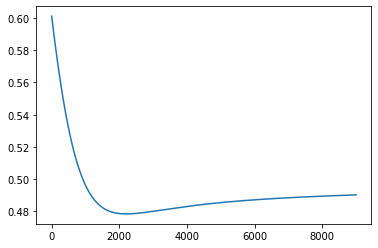

In [60]:
plot_cost(mse)

In [61]:
epochs = 1000 
alpha =  0.001
kParts = 5;

In [62]:
kFoldCrossValidation(matrix_x, vector_y, kParts, gradient_logistic_regression, alpha, epochs)

Predicted:  1.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.

[array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.2]),
 array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.2]),
 array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.2]),
 array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.2]),
 array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.2])]

In [63]:
predctions_gd = predict_logistic_regression_binary(matrix_x, w_gd)

In [69]:
def stochastic_gradient_descent(matrix_x, vector_y, epochs, alpha):
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)
    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_predicted = matrix_x.dot(w_matrix)
    data =np.append(matrix_x, np.split(vector_y, matrix_x.shape[0], axis=0), axis=1)
    mse = []

    for epoch in range(epochs):
        erro = 0
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            w_matrix  = w_matrix + alpha * (vector_y[i] - sigmoide(y_predicted[i])) * matrix_x[i]
            somatorio += (vector_y[i] - sigmoide(y_predicted[i])) * matrix_x[i]
        
        mse.append((-1/matrix_x.shape[0]) * somatorio)        
        data = np.random.permutation(data)
        matrix_x = data[: ,0:matrix_x.shape[1]]
        vector_y = data[:,matrix_x.shape[1]]
        
        y_predicted = matrix_x.dot(w_matrix)  
    
    return w_matrix, mse

In [65]:
w_gde, mse = stochastic_gradient_descent(matrix_x, vector_y, 10000, 0.001)

In [66]:
w_gde

array([-498.47703627,  364.70980605, -342.06964503,  486.27425106,
        481.44881975])

In [67]:
predctions_gde = predict_logistic_regression_binary(matrix_x, w_gde)

In [70]:
kFoldCrossValidation(matrix_x, vector_y, kParts, stochastic_logistic_regression, alpha, epochs)

Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  0.0 Actual:  0.0
Predicted:  1.0 Actual:  1.0
Predicted:  1.

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])]

## Multiclass logistic regression

In [92]:
matrix_x_multiclass = np.array(iris_data_multiclass[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
vector_y_multiclass = np.array(iris_data_multiclass[['flower1', 'flower2', 'flower3']])

In [93]:
matrix_x_multiclass, vector_y_multiclass = normalization(matrix_x_multiclass, vector_y_multiclass)

In [86]:
def gradient_descent_multiclass(matrix_x, vector_y, epochs, alpha):
    
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)
    
    size = (vector_y.shape[1], matrix_x.shape[1])
    w_matrix = np.ones(size, dtype=float)

    mse = []
    for k in range(w_matrix.shape[0]): 
        y_aux = w_matrix[k].dot(np.transpose(matrix_x))

        for epoch in range(epochs):
            somatorio = 0
            for i in range(matrix_x.shape[0]):
                _sum = 0
                for j in range(w_matrix.shape[0]):
                    _sum += np.exp(w_matrix[j].dot(matrix_x[i]))
                
                err = np.exp(y_aux[i])/_sum
                somatorio += (vector_y[i][k] - err) * matrix_x[i]
            
            mse.append((-1/matrix_x.shape[0]) * somatorio)
            w_matrix[k] = w_matrix[k] + (alpha/matrix_x.shape[0])*somatorio
            y_aux = w_matrix[k].dot(np.transpose(matrix_x))


    return w_matrix, mse

In [97]:
w_gd_m, mse = gradient_descent_multiclass(matrix_x_multiclass, vector_y_multiclass, 10000, 0.01)

In [98]:
w_gd_m

array([[-32.43258678, -37.07709576,  32.77808385, -48.05638174,
        -46.1842269 ],
       [-21.05575389,   3.25982491, -20.42469787,   8.55694086,
          2.72640771],
       [-45.15104259,  26.79114703,  -7.78928992,  34.28823158,
         38.36118226]])

In [92]:
predictions_gd_m = predict_multiclass_logistic_regression(matrix_x_multiclass, w_gd_m)

In [89]:
def stochastic_gradient_descent_multiclass(matrix_x, vector_y, epochs, alpha):
    
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)

    size = (vector_y.shape[1], matrix_x.shape[1])    
    w_matrix = np.ones(size, dtype=float)
    #y_chapeu = matrix_x.dot(w_matrix)
    #data =np.append(matrix_x, np.split(vector_y, matrix_x.shape[0], axis=0), axis=1)

    data =np.append(matrix_x, vector_y, axis=1)
    
    mse = []

    for k in range(w_matrix.shape[0]):
        y_aux = w_matrix[k].dot(np.transpose(matrix_x))

        for epoch in range(epochs):
            #somatorio = 0
            for i in range(matrix_x.shape[0]):
                _sum = 0
                for j in range(w_matrix.shape[0]):
                    _sum += np.exp(w_matrix[j].dot(matrix_x[i]))
        
                err = np.exp(y_aux[i])/_sum
                
                w_matrix[k] = w_matrix[k] + alpha * (vector_y[i][k] - err) * matrix_x[i]
                #somatorio += (vector_y[i] - sigmoide(y_chapeu[i])) * matrix_x[i]

            #mse.append((-1/matrix_x.shape[0]) * somatorio)        
            data = np.random.permutation(data)
            matrix_x = data[: ,0:matrix_x.shape[1]]
            vector_y = data[:,matrix_x.shape[1]:]
            y_aux = w_matrix[k].dot(np.transpose(matrix_x))
            
                
    return w_matrix, mse

In [90]:
w_gde_m, mse = stochastic_gradient_descent_multiclass(matrix_x_multiclass, vector_y_multiclass, 10000, 0.0001)

NameError: name 'matrix_x_multiclass' is not defined

In [91]:
w_gde_m

NameError: name 'w_gde_m' is not defined

In [102]:
predictions_gde_m = predict_multiclass_logistic_regression(matrix_x_multiclass, w_gde_m)

In [94]:
kFoldCrossValidationMulticlass(matrix_x_multiclass, vector_y_multiclass, kParts, gradient_logistic_regression_multiclass, alpha, epochs)

Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [0. 1. 0.] Actual:  [0. 1. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [0. 1. 0.] Actual:  [0. 1. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [0. 1. 0.] Actual:  [0. 1. 0.]
Predicted: 

[array([[ 0. , -0.2, -0.2],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]]), array([[ 0. , -0.2, -0.2],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]]), array([[ 0. , -0.2, -0.2],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]]), array([[ 0. , -0.2, -0.2],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]]), array([[ 0. , -0.2, -0.2],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]])]

In [95]:
kFoldCrossValidationMulticlass(matrix_x_multiclass, vector_y_multiclass, kParts, stochastic_logistic_regression_multiclass, alpha, epochs)

Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 1. 0.]
Predicted:  [0. 1. 0.] Actual:  [0. 1. 0.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [1. 0. 0.] Actual:  [1. 0. 0.]
Predicted:  [0. 1. 0.] Actual:  [0. 1. 0.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted:  [0. 0. 1.] Actual:  [0. 0. 1.]
Predicted: 

[array([[-0.2, -0.2,  0. ],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]]), array([[-0.2, -0.2,  0. ],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]]), array([[-0.2, -0.2,  0. ],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]]), array([[-0.2, -0.2,  0. ],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]]), array([[-0.2, -0.2,  0. ],
        [ 0. ,  0. ,  0.2],
        [ 0. ,  0. ,  0.2]])]